In [1]:

import pandas as pd
from astropy.io import fits, ascii
import numpy as np
import matplotlib.pyplot as plt
import splat
import numpy
import astropy.units as u
from astropy import constants as const 
import copy
from scipy.integrate import trapz        # for numerical integration
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord, CylindricalDifferential
import pandas as pd
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
DATA='/users/caganze/Downloads/output'

In [3]:
sim=ascii.read(DATA).to_pandas()

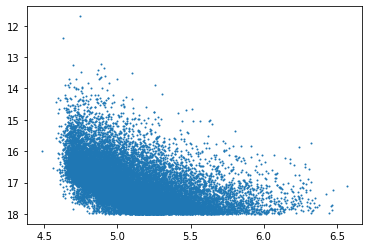

In [4]:
fig, ax=plt.subplots()
plt.scatter( sim['u-z'], sim.u, s=1.)
ax.invert_yaxis()

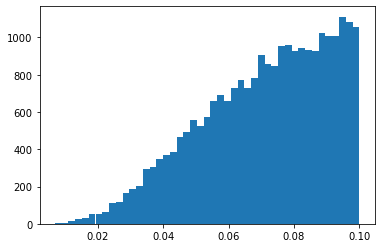

In [5]:
h=plt.hist(sim.Dist.values, bins='auto')

In [6]:
from scipy import stats

In [7]:
#width = smax - smin
x = np.linspace(sim.Age.values.min(),  sim.Age.values.max(), 100)
y = stats.gaussian_kde(sim.Age.values)(x)

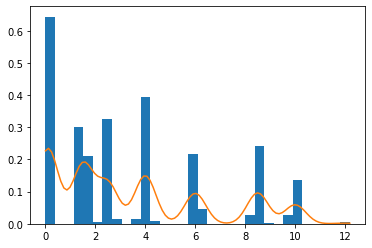

In [8]:
h=plt.hist(sim.Age.values, bins=32, log=False, density=True)
plt.plot(x, y)

In [9]:
gcs=pd.read_csv('/users/caganze/research/J1624/data//gcs_catalog.csv')

In [24]:
gcs.columns

Index(['Unnamed: 0', 'Name', 'm_Name', 'H09', 'logg', 'Teff', 'Fbol',
       '__Fe_H_', '__a_Fe_', 'RAJ2000', 'DEJ2000', 'RV', 'ageMLP', 'M.MLP',
       'SimbadName'],
      dtype='object')

In [10]:
from astroquery.vizier import Vizier

In [11]:
Vizier.ROW_LIMIT = -1 
valenti = Vizier.get_catalogs('J/AJ/157/231')

In [12]:
luck=Vizier.get_catalogs('J/AJ/153/21')

In [13]:
brewer=Vizier.get_catalogs('J/ApJS/225/32')

In [14]:
brewer

TableList with 2 tables:
	'0:J/ApJS/225/32/stars' with 28 column(s) and 1615 row(s) 
	'1:J/ApJS/225/32/table7' with 7 column(s) and 7555 row(s) 

In [15]:
luck

TableList with 6 tables:
	'0:J/AJ/153/21/table1' with 13 column(s) and 1002 row(s) 
	'1:J/AJ/153/21/table2' with 11 column(s) and 1002 row(s) 
	'2:J/AJ/153/21/table3' with 16 column(s) and 1041 row(s) 
	'3:J/AJ/153/21/table4' with 34 column(s) and 1041 row(s) 
	'4:J/AJ/153/21/table5' with 21 column(s) and 1041 row(s) 
	'5:J/AJ/153/21/table7' with 20 column(s) and 1041 row(s) 

In [16]:
DATA_FOLDER='/users/caganze/research/J1624/data/'

In [17]:
(valenti[0]['DR2Name','RA_ICRS', 'DE_ICRS']).to_pandas().to_csv(DATA_FOLDER+'/valenti_sample_ids.csv')

In [18]:
(valenti[0]).to_pandas().to_csv(DATA_FOLDER+'/valenti_sample.csv')

In [19]:
valenti_crossmatch=pd.read_csv(DATA_FOLDER+'/1622153564167O-result.csv')

In [20]:
vldf=valenti[0].to_pandas().rename(columns={'Source': 'source_id'})

In [26]:
vldf.columns

Index(['DR2Name', 'source_id', 'RV', 'RA_ICRS', 'DE_ICRS', 'umag', 'gmag',
       'rmag', 'imag', 'zmag', 'EW_HA_', 'Plx'],
      dtype='object')

In [27]:
gcs.columns

Index(['Unnamed: 0', 'Name', 'm_Name', 'H09', 'logg', 'Teff', 'Fbol',
       '__Fe_H_', '__a_Fe_', 'RAJ2000', 'DEJ2000', 'RV', 'ageMLP', 'M.MLP',
       'SimbadName'],
      dtype='object')

### from astroquery.gaia import Gaia